<a href="https://colab.research.google.com/github/ersozbasak/Machine-Learning-Regression-Models/blob/master/1_KNN_PJM_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

EVALUATION OF PJM VALUES

1. Introduction and Integration (Regularization the Data Set)
2. Machine Learning Integration
3. Deep Learning Integration


### Regularization the Data Set

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import gc
import sys
#mpl.rcParams['figure.figsize'] = (17, 5)
#mpl.rcParams['axes.grid'] = False
#sns.set_style("whitegrid")
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation,Dropout
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf
import csv

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/PJM_Values
%ls

/content/drive/.shortcut-targets-by-id/1y7ldZ9miFJ8MrdkTMxxYELYyYZlyykhC/PJM_Values
KNN_PJM_dataset.csv                rt_hrl_lmps_MARCH_MAY.csv
LSTM_PJM/                          rt_hrl_lmps_SEP_NOV.csv
rt_hrl_lmps_22JUNE_23JUNE_ALL.csv  structured_data_classifier/
rt_hrl_lmps_DEC_FEB.csv            structured_data_regressor/
rt_hrl_lmps_JUNE_AGU.csv


In [ ]:
df_22JUNE_23JUNE_ALL = pd.read_csv('/content/drive/MyDrive/PJM_Values/rt_hrl_lmps_22JUNE_23JUNE_ALL.csv',engine='python',encoding='utf-8')
df_JUNE_AGU = pd.read_csv('/content/drive/MyDrive/PJM_Values/rt_hrl_lmps_JUNE_AGU.csv',engine='python',encoding='utf-8')
df_SEP_NOV = pd.read_csv('/content/drive/MyDrive/PJM_Values/rt_hrl_lmps_SEP_NOV.csv',engine='python',encoding='utf-8')
df_DEC_FEB = pd.read_csv('/content/drive/MyDrive/PJM_Values/rt_hrl_lmps_DEC_FEB.csv',engine='python',encoding='utf-8')
df_MARCH_MAY = pd.read_csv('/content/drive/MyDrive/PJM_Values/rt_hrl_lmps_MARCH_MAY.csv',engine='python',encoding='utf-8')

In [ ]:
"""lmp_DEC_FEB = df_DEC_FEB[df_DEC_FEB['VALUE'].isin(['LMP'])]
lmp_MARCH_MAY = df_MARCH_MAY[df_MARCH_MAY['VALUE'].isin(['LMP'])]
lmp_JUNE_AGU = df_JUNE_AGU[df_JUNE_AGU['VALUE'].isin(['LMP'])]
lmp_SEP_NOV = df_SEP_NOV[df_SEP_NOV['VALUE'].isin(['LMP'])]
loadzone_DEC_FEB = lmp_DEC_FEB[lmp_DEC_FEB['TYPE'].isin(['Loadzone'])]
loadzone_MARCH_MAY = lmp_MARCH_MAY[lmp_MARCH_MAY['TYPE'].isin(['Loadzone'])]
loadzone_JUNE_AGU = lmp_JUNE_AGU[lmp_JUNE_AGU['TYPE'].isin(['Loadzone'])]
loadzone_SEP_NOV = lmp_SEP_NOV[lmp_SEP_NOV['TYPE'].isin(['Loadzone'])]"""

"lmp_DEC_FEB = df_DEC_FEB[df_DEC_FEB['VALUE'].isin(['LMP'])]\nlmp_MARCH_MAY = df_MARCH_MAY[df_MARCH_MAY['VALUE'].isin(['LMP'])]\nlmp_JUNE_AGU = df_JUNE_AGU[df_JUNE_AGU['VALUE'].isin(['LMP'])]\nlmp_SEP_NOV = df_SEP_NOV[df_SEP_NOV['VALUE'].isin(['LMP'])]\nloadzone_DEC_FEB = lmp_DEC_FEB[lmp_DEC_FEB['TYPE'].isin(['Loadzone'])]\nloadzone_MARCH_MAY = lmp_MARCH_MAY[lmp_MARCH_MAY['TYPE'].isin(['Loadzone'])]\nloadzone_JUNE_AGU = lmp_JUNE_AGU[lmp_JUNE_AGU['TYPE'].isin(['Loadzone'])]\nloadzone_SEP_NOV = lmp_SEP_NOV[lmp_SEP_NOV['TYPE'].isin(['Loadzone'])]"

In [ ]:
grouped_df_ALL = df_22JUNE_23JUNE_ALL.groupby('pnode_name')# Group HUB dataframe by the 'pnode_name' column
group_names_jm = grouped_df_ALL.groups.keys()# Get the names of each group = 12

In [ ]:
len(group_names_jm)

12

In [ ]:
df_list_22_23 = [ df_22JUNE_23JUNE_ALL]

for i in df_list_22_23:
    i.drop('datetime_beginning_utc', inplace=True, axis=1)
    i.drop('datetime_beginning_ept', inplace=True, axis=1)
    i.drop('pnode_id', inplace=True, axis=1)
    i.drop('voltage', inplace=True, axis=1)
    i.drop('equipment', inplace=True, axis=1)
    i.drop('type', inplace=True, axis=1)
    i.drop('zone', inplace=True, axis=1)
    i.drop('congestion_price_rt', inplace=True, axis=1)
    i.drop('marginal_loss_price_rt', inplace=True, axis=1)
    i.drop('system_energy_price_rt', inplace=True, axis=1)
    i.drop('row_is_current', inplace=True, axis=1)
    i.drop('version_nbr', inplace=True, axis=1)

In [ ]:
print(df_22JUNE_23JUNE_ALL.dtypes)

pnode_name       object
total_lmp_rt    float64
dtype: object


In [ ]:
df_22JUNE_23JUNE_ALL.head()

,pnode_name,total_lmp_rt
0,EASTERN HUB,69.669366
1,WEST INT HUB,67.783333
2,WESTERN HUB,68.755145
3,NEW JERSEY HUB,69.168388
4,CHICAGO GEN HUB,65.559705


In [ ]:
common_nodes = set(df_22JUNE_23JUNE_ALL['pnode_name'].unique())
df_22JUNE_23JUNE_ALL_filtered=df_22JUNE_23JUNE_ALL[df_22JUNE_23JUNE_ALL['pnode_name'].isin(common_nodes)]


In [ ]:
df_22JUNE_23JUNE_ALL_filtered

,pnode_name,total_lmp_rt
0,EASTERN HUB,69.669366
1,WEST INT HUB,67.783333
2,WESTERN HUB,68.755145
3,NEW JERSEY HUB,69.168388
4,CHICAGO GEN HUB,65.559705
...,...,...
105415,AEP GEN HUB,17.748531
105416,AEP-DAYTON HUB,18.123747
105417,OHIO HUB,18.155619
105418,DOMINION HUB,18.230117


In [ ]:
count_nan=df_22JUNE_23JUNE_ALL_filtered.isnull().sum()
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: pnode_name      0
total_lmp_rt    0
dtype: int64


In [ ]:
grouped_df = df_22JUNE_23JUNE_ALL_filtered.groupby('pnode_name')# Group the loadzone_2016 dataframe by the 'NODE' column
group_names = grouped_df.groups.keys()# Get the names of each group
len(group_names)

12

In [ ]:
# group the merged_df dataframe by the 'NODE' column
grouped_df = df_22JUNE_23JUNE_ALL_filtered.groupby('pnode_name')

# get the names of each group
group_names = grouped_df.groups.keys()

node_list = []

# iterate through the grouped dataframe, get each group by its name, and append it to the node_list
for key, item in grouped_df:
    node_df = grouped_df.get_group(key)
    node_list.append(node_df)

stacked_df = []

# iterate through the node_list, drop the 'NODE' column, stack the dataframe, and append it to the stacked_df
for i in node_list:
    i_drop = i.drop('pnode_name', axis=1)
    s_df = i_drop.stack().reset_index(drop=True)
    stacked_df.append(s_df)

node_dfs = {}
df_list = []

# iterate through the group_names, create a dataframe for each node, and append it to the df_list
for i, node in enumerate(group_names):
    node_dfs[node] = pd.DataFrame(stacked_df[i], columns=[node])
    df_list.append(node_dfs[node])

# concatenate the dataframes in the df_list along the columns to get the final dataframe
df_all_2223 = pd.concat(df_list, axis=1)

In [ ]:
df_all_2223.head()

,AEP GEN HUB,AEP-DAYTON HUB,ATSI GEN HUB,CHICAGO GEN HUB,CHICAGO HUB,DOMINION HUB,EASTERN HUB,N ILLINOIS HUB,NEW JERSEY HUB,OHIO HUB,WEST INT HUB,WESTERN HUB
0,66.526689,68.095556,67.318277,65.559705,66.693074,69.495414,69.669366,66.248896,69.168388,68.268067,67.783333,68.755145
1,73.990110,75.501068,74.708125,72.656474,73.844903,77.405280,77.793004,73.368035,77.122941,75.629564,75.400555,76.753895
2,55.928728,56.996921,56.571705,54.765039,55.588311,58.358574,58.999558,55.258335,58.545221,57.086478,57.017916,58.048027
3,52.131930,53.100233,52.694148,51.074570,51.790448,54.294922,54.701800,51.508351,54.240732,53.176826,53.095880,53.991960
4,51.751316,52.390917,51.786250,49.386083,50.045211,53.740003,53.799772,49.809685,53.344182,52.374108,52.381388,53.275979


In [ ]:
count_nan = df_all_2223.isnull().sum()
print('Number of NaN values present: ' + str(count_nan))


Number of NaN values present: AEP GEN HUB        0
AEP-DAYTON HUB     0
ATSI GEN HUB       0
CHICAGO GEN HUB    0
CHICAGO HUB        0
DOMINION HUB       0
EASTERN HUB        0
N ILLINOIS HUB     0
NEW JERSEY HUB     0
OHIO HUB           0
WEST INT HUB       0
WESTERN HUB        0
dtype: int64


In [ ]:
# Save the modified dataset as a new CSV file
save_path ='/content/drive/MyDrive/New_PJM_ML/KNN/df_all_2223_KNN'
df_all_2223.to_csv(save_path, index=False)

In [ ]:
%cd /content/drive/MyDrive/New_PJM_ML/kMeans
%ls
# Save the modified dataset as a new CSV file
df_all_2223.to_csv("pjm_dataset_all.csv", index=False)
%ls

/content/drive/.shortcut-targets-by-id/1KIngltLQmHhYc3ztZl6sVXvAe_rP7VvU/New_PJM_ML/kMeans
clustering_comparison.csv       kmeans_5_model.pkl
kMeans_5_3d_random4.svg         kMeans_5_other_clusters.csv
kMeans_5_largest_cluster.csv    kMeans_5_random4.svg
kmeans_5_model_backup_6696.pkl  pjm_dataset_all.csv
clustering_comparison.csv       kmeans_5_model.pkl
kMeans_5_3d_random4.svg         kMeans_5_other_clusters.csv
kMeans_5_largest_cluster.csv    kMeans_5_random4.svg
kmeans_5_model_backup_6696.pkl  pjm_dataset_all.csv


In [ ]:
df_all_2223.head()

,AEP GEN HUB,AEP-DAYTON HUB,ATSI GEN HUB,CHICAGO GEN HUB,CHICAGO HUB,DOMINION HUB,EASTERN HUB,N ILLINOIS HUB,NEW JERSEY HUB,OHIO HUB,WEST INT HUB,WESTERN HUB
0,66.526689,68.095556,67.318277,65.559705,66.693074,69.495414,69.669366,66.248896,69.168388,68.268067,67.783333,68.755145
1,73.990110,75.501068,74.708125,72.656474,73.844903,77.405280,77.793004,73.368035,77.122941,75.629564,75.400555,76.753895
2,55.928728,56.996921,56.571705,54.765039,55.588311,58.358574,58.999558,55.258335,58.545221,57.086478,57.017916,58.048027
3,52.131930,53.100233,52.694148,51.074570,51.790448,54.294922,54.701800,51.508351,54.240732,53.176826,53.095880,53.991960
4,51.751316,52.390917,51.786250,49.386083,50.045211,53.740003,53.799772,49.809685,53.344182,52.374108,52.381388,53.275979


In [ ]:
df_all_2223

,AEP GEN HUB,AEP-DAYTON HUB,ATSI GEN HUB,CHICAGO GEN HUB,CHICAGO HUB,DOMINION HUB,EASTERN HUB,N ILLINOIS HUB,NEW JERSEY HUB,OHIO HUB,WEST INT HUB,WESTERN HUB
0,66.526689,68.095556,67.318277,65.559705,66.693074,69.495414,69.669366,66.248896,69.168388,68.268067,67.783333,68.755145
1,73.990110,75.501068,74.708125,72.656474,73.844903,77.405280,77.793004,73.368035,77.122941,75.629564,75.400555,76.753895
2,55.928728,56.996921,56.571705,54.765039,55.588311,58.358574,58.999558,55.258335,58.545221,57.086478,57.017916,58.048027
3,52.131930,53.100233,52.694148,51.074570,51.790448,54.294922,54.701800,51.508351,54.240732,53.176826,53.095880,53.991960
4,51.751316,52.390917,51.786250,49.386083,50.045211,53.740003,53.799772,49.809685,53.344182,52.374108,52.381388,53.275979
...,...,...,...,...,...,...,...,...,...,...,...,...
8780,40.385504,41.826911,41.265341,40.868154,41.504461,40.864404,38.182863,41.262732,38.245036,42.140567,40.678797,40.893079
8781,36.484737,37.688131,37.030644,36.783083,37.332459,37.237394,35.006358,37.121669,34.942577,37.917976,36.739306,36.893853
8782,26.041513,26.862939,26.062576,26.412109,26.802300,26.864957,22.804033,26.641553,23.194212,27.018790,26.099814,26.064243
8783,22.436031,23.111215,22.307936,22.598397,22.940277,22.976768,20.179709,22.802370,20.341271,23.241002,22.339676,22.208324


## Deep Learning Part
LSTM

In [ ]:
df=df_all_2223

In [ ]:
class LSTM():
    def __init__(self, lookback, features, forecast):
        self.lookback = lookback
        self.features = features
        self.forecast = forecast


    def df(self, dataframe, lookback, features, forecast):
        df = dataframe.values
        # Create the X and y arrays
        self.X, self.y = [], []
        for i in range(self.lookback, len(df) - self.forecast):
            self.X.append(df[i-self.lookback:i])
            self.y.append(df[i:i+self.forecast, 0]) # USD feature

      # Reshape the X and y arrays
        self.X, self.y = np.array(self.X), np.array(self.y)
        self.X = np.reshape(self.X, (self.X.shape[0], self.X.shape[1], self.features)) # (batch_size, lookback, features)
        self.y = np.reshape(self.y, (self.y.shape[0], self.forecast)) # (batch_size, forecast)

        return self.X, self.y


In [ ]:
lstm = LSTM(lookback=11, features=12, forecast=1)

In [ ]:
X_all, y_all = lstm.df(dataframe = df, lookback = 11, features = 12, forecast = 1)

In [ ]:
#X_all

In [ ]:
#y_all

In [ ]:
print("X_all shape : {}".format(X_all.shape))
print("y_all shape : {}".format(y_all.shape))


X_all shape : (8773, 11, 12)
y_all shape : (8773, 1)


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3,random_state=123)

In [ ]:
import pickle

# Create a dictionary to store the datasets
dataset = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

# Export the dataset using pickle
with open('dataset.pkl', 'wb') as file:
    pickle.dump(dataset, file)

In [ ]:
import pickle

# Load the dataset from the pickle file
with open('dataset.pkl', 'rb') as file:
    dataset = pickle.load(file)

# Access the training and test sets
X_train = dataset['X_train']
X_test = dataset['X_test']
y_train = dataset['y_train']
y_test = dataset['y_test']

In [ ]:
print(y_all.max())
print(X_all.max())
print(y_all.min())
print(X_all.min())

print(np.mean(y_all))
print(np.mean(X_all))

3761.41375
4360.850238
0.572412
-126.30799
58.4977009090391
57.41040754323011


In [ ]:
print("X_train shape : {}".format(X_train.shape))
print("y_train shape : {}".format(y_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_test shape : {}".format(y_test.shape))

X_train shape : (6141, 11, 12)
y_train shape : (6141, 1)
X_test shape : (2632, 11, 12)
y_test shape : (2632, 1)


In [ ]:

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(l_rate, epoch, batchsize, x_train_data, y_train_data):

  #early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15,mode='min', restore_best_weights=True)#ceed
  lstm_model = tf.keras.Sequential()
  #lstm_model.add(tf.keras.layers.LSTM(256,activation='relu',input_shape=(lstm.lookback, lstm.features),return_sequences=True))
  #lstm_model.add(tf.keras.layers.LSTM(128,activation='relu',input_shape=(lstm.lookback, lstm.features),return_sequences=True))
  #lstm_model.add(tf.keras.layers.LSTM(64,activation='relu',input_shape=(lstm.lookback, lstm.features),return_sequences=True))
  lstm_model.add(tf.keras.layers.LSTM(64,activation='relu'))
  lstm_model.add(tf.keras.layers.Dense(units=lstm.forecast))

  opt = tf.optimizers.Adam(learning_rate=l_rate)
  lstm_model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=opt,
    metrics=[tf.metrics.MeanAbsoluteError()]
    )

  lstm_history = lstm_model.fit(x_train_data, y_train_data,
    epochs=epoch,
    batch_size = batchsize,
    verbose=1,
    validation_split = 0.2,
    shuffle=False,
    #callbacks = [early_stopping]
    )

  return lstm_history, lstm_model


In [ ]:
history, model = create_model(l_rate = 0.001, epoch = 300, batchsize = 64, x_train_data = X_train, y_train_data = y_train)

Epoch 1/300
77/77 [==============================] - 4s 17ms/step - loss: 8337.0693 - mean_absolute_error: 24.1897 - val_loss: 3891.0054 - val_mean_absolute_error: 20.3926
Epoch 2/300
77/77 [==============================] - 1s 13ms/step - loss: 5876.5986 - mean_absolute_error: 19.5620 - val_loss: 1757.9937 - val_mean_absolute_error: 14.9476
Epoch 3/300
77/77 [==============================] - 1s 12ms/step - loss: 4886.1304 - mean_absolute_error: 16.7178 - val_loss: 2303.3447 - val_mean_absolute_error: 13.9163
Epoch 4/300
77/77 [==============================] - 1s 13ms/step - loss: 5190.1963 - mean_absolute_error: 16.1173 - val_loss: 2439.7429 - val_mean_absolute_error: 13.3868
Epoch 5/300
77/77 [==============================] - 1s 13ms/step - loss: 5389.1445 - mean_absolute_error: 14.9727 - val_loss: 2438.7178 - val_mean_absolute_error: 13.3656
Epoch 6/300
77/77 [==============================] - 1s 12ms/step - loss: 5352.3032 - mean_absolute_error: 16.4336 - val_loss: 2761.0457 - v

In [ ]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss', linewidth=1,color='green')
    plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=1,color='purple')
    plt.title(title)
    plt.legend()

    plt.show()

In [ ]:
import pickle

# Save history to a file
with open('history_lstm_all.pkl', 'wb') as file:
    pickle.dump(history, file)

with open('model_lstm_all.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle

# Load history from file
with open('history_lstm_all.pkl', 'rb') as file:
    history = pickle.load(file)

with open('model_lstm_all.pkl', 'rb') as file:
    model = pickle.load(file)

<ipython-input-141-6b1627954cc9>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', linewidth=1,color='green')
<ipython-input-141-6b1627954cc9>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=1,color='purple')


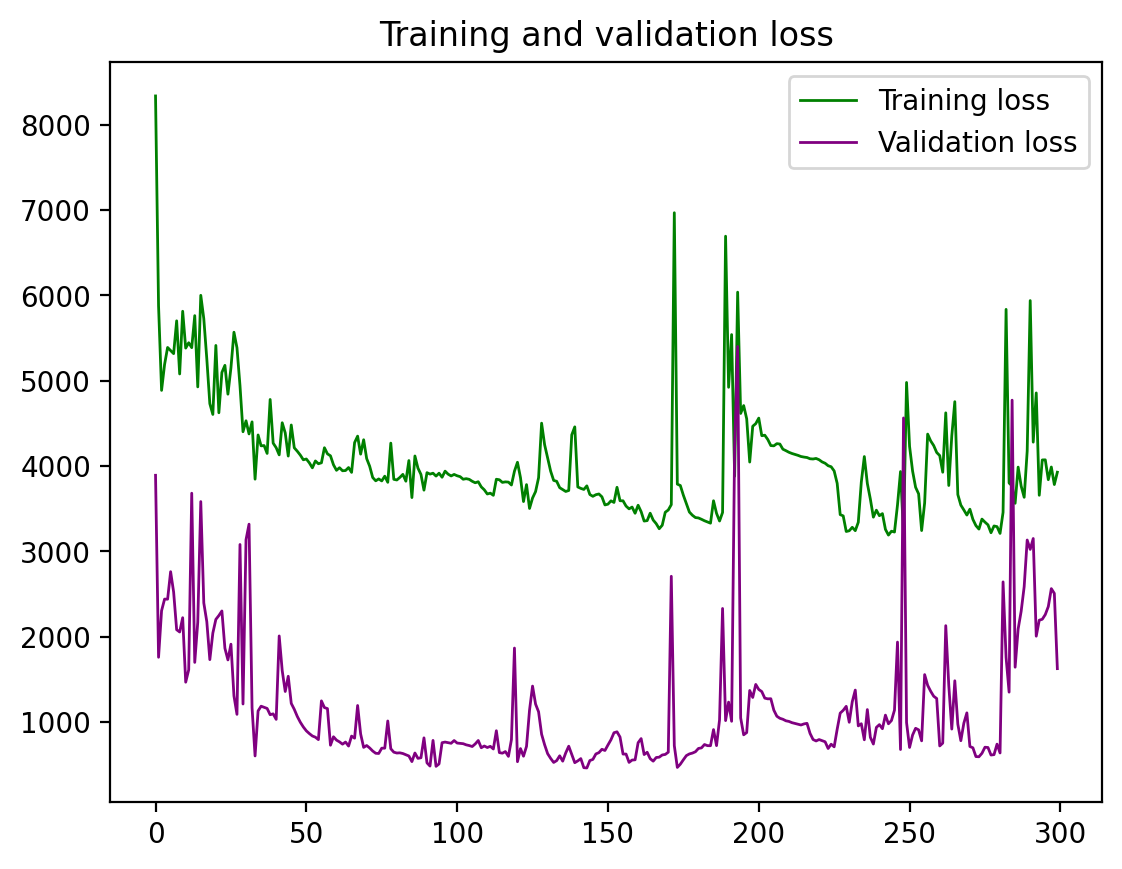

In [ ]:
plot_train_history(history,
                   'Training and validation loss')

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

83/83 [==============================] - 1s 4ms/step


In [ ]:
#y_pred

In [ ]:
#y_test

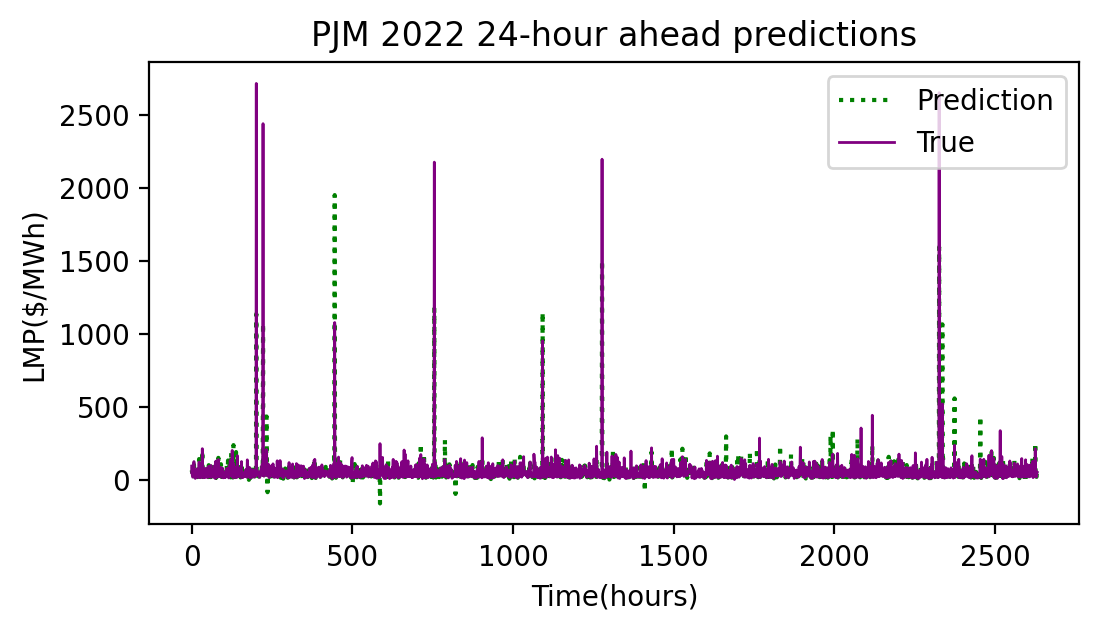

In [ ]:
plt.figure(figsize=(6,3))


plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("PJM 2022 24-hour ahead predictions")

hour= 24
n_day = 365
plot_day = hour*n_day

plt.plot(y_pred[:,-1], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test[:, -1], label='True', linewidth=1,color='purple')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
errors = y_pred- y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('Mean Absolute Error: {:.2f}'.format(mae))
print('Root Mean Square Error: {:.2f}'.format(rmse))
print('R2 Score: ', r2_score(y_test, y_pred))


Mean Absolute Error: 16.66
Root Mean Square Error: 61.49
R2 Score:  0.7080364443913515


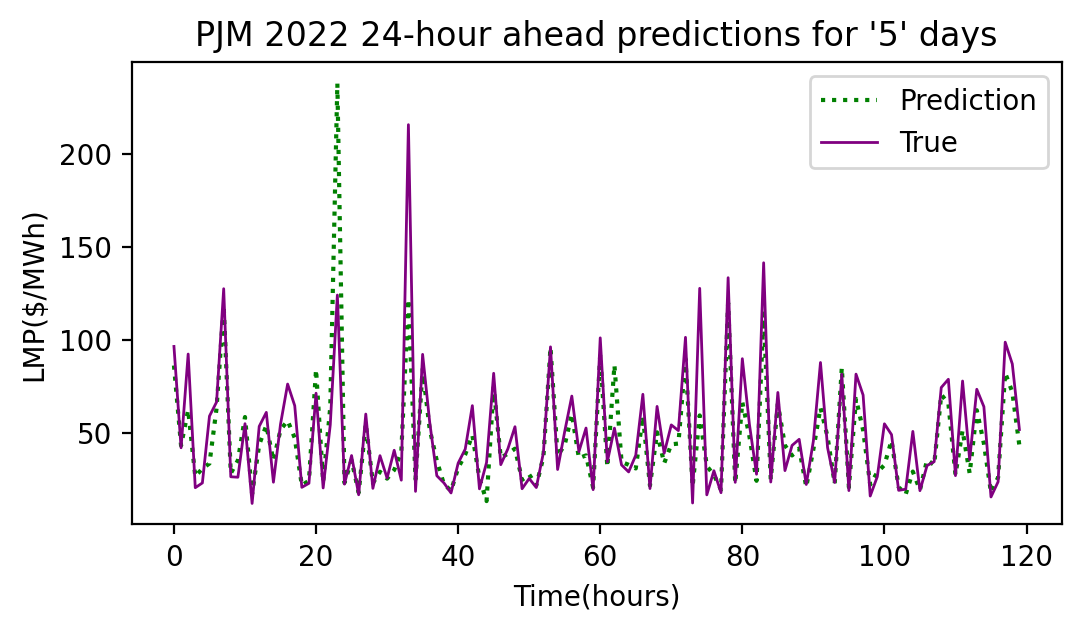

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("PJM 2022 24-hour ahead predictions for '5' days")

hour= 24
n_day = 5
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='True', linewidth=1,color='purple')

plt.legend()
plt.show()

## Gated Recurrent Units (GRUs)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU, Dense


In [ ]:
class GRU():
    def __init__(self, lookback, features, forecast):
        self.lookback = lookback
        self.features = features
        self.forecast = forecast

    def df(self, dataframe, lookback, features, forecast):
        df = dataframe.values
        # Create the X and y arrays
        self.X, self.y = [], []
        for i in range(self.lookback, len(df) - self.forecast):
            self.X.append(df[i-self.lookback:i])
            self.y.append(df[i:i+self.forecast, 0])  # USD feature

        # Reshape the X and y arrays
        self.X, self.y = np.array(self.X), np.array(self.y)
        self.X = np.reshape(self.X, (self.X.shape[0], self.X.shape[1], self.features))  # (batch_size, lookback, features)
        self.y = np.reshape(self.y, (self.y.shape[0], self.forecast))  # (batch_size, forecast)

        return self.X, self.y

In [ ]:
gru_model = GRU(lookback=10, features=11, forecast=1)  # Create an instance of the GRU class
X, y = gru_model.df(dataframe = df, lookback=10, features=11, forecast=1)  # Get preprocessed data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have the appropriate shape for GRU
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Create a sequential model
model = Sequential()

# Add a GRU layer
model.add(GRU(units=32, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Once the model is trained, you can use it to make predictions
y_pred = model.predict(X_test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-566-1476553e0b54>", line 2, in <cell line: 2>
    X, y = gru_model.df(dataframe = df, lookback=10, features=11, forecast=1)  # Get preprocessed data
  File "<ipython-input-561-b80e9935f073>", line 17, in df
    self.X = np.reshape(self.X, (self.X.shape[0], self.X.shape[1], self.features))  # (batch_size, lookback, features)
  File "<__array_function__ internals>", line 180, in reshape
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py", line 298, in reshape
    return _wrapfunc(a, 'reshape', newshape, order=order)
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py", line 57, in _wrapfunc
    return bound(*args, **kwds)
ValueError: cannot reshape array of size 1052880 into shape (8774,10,11)

During handling of the above except

In [ ]:
def create_model(l_rate, epoch, batchsize, x_train_data, y_train_data):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, mode='min', restore_best_weights=True)
    gru_model = tf.keras.Sequential()
    gru_model.add(tf.keras.layers.GRU(64, activation='relu', input_shape=(x_train_data.shape[1], x_train_data.shape[2])))
    gru_model.add(tf.keras.layers.Dense(units=y_train_data.shape[1]))

    opt = tf.optimizers.Adam(learning_rate=l_rate)
    gru_model.compile(
        loss=tf.losses.MeanSquaredError(),
        optimizer=opt,
        metrics=[tf.metrics.MeanAbsoluteError()]
    )

    gru_history = gru_model.fit(
        x_train_data,
        y_train_data,
        epochs=epoch,
        batch_size=batchsize,
        verbose=1,
        validation_split=0.2,
        shuffle=False,
        callbacks=[early_stopping]
    )

    return gru_history, gru_model

In [ ]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss', linewidth=1, color='green')
    plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=1, color='purple')
    plt.title(title)
    plt.legend()

    plt.show()

<ipython-input-567-bbb54166f8eb>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', linewidth=1, color='green')
<ipython-input-567-bbb54166f8eb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=1, color='purple')


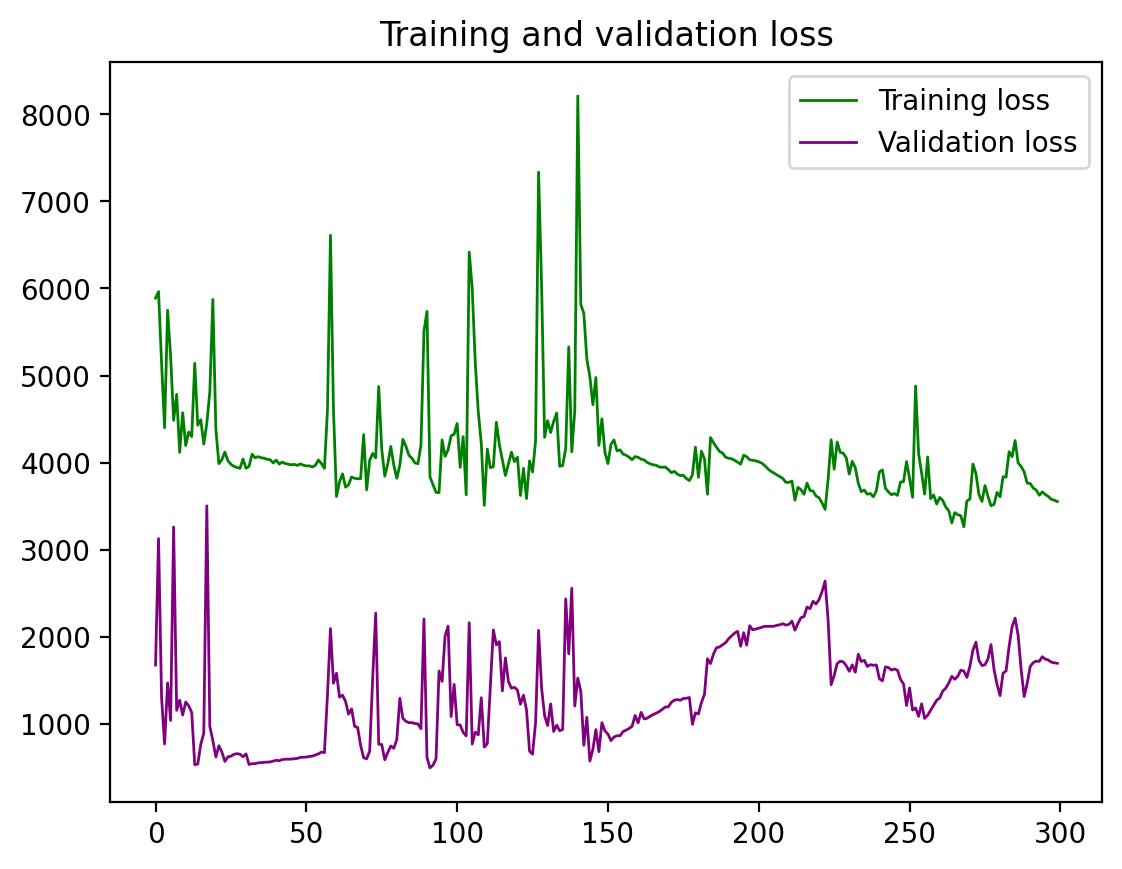

In [ ]:
plot_train_history(history,
                   'Training and validation loss')

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

83/83 [==============================] - 0s 5ms/step


In [ ]:
y_pred


array([[91.022804],
       [46.078438],
       [70.15632 ],
       ...,
       [23.482273],
       [44.247475],
       [55.90207 ]], dtype=float32)

In [ ]:
y_test


array([[96.593355],
       [42.199583],
       [92.505307],
       ...,
       [22.515943],
       [43.685636],
       [54.753224]])

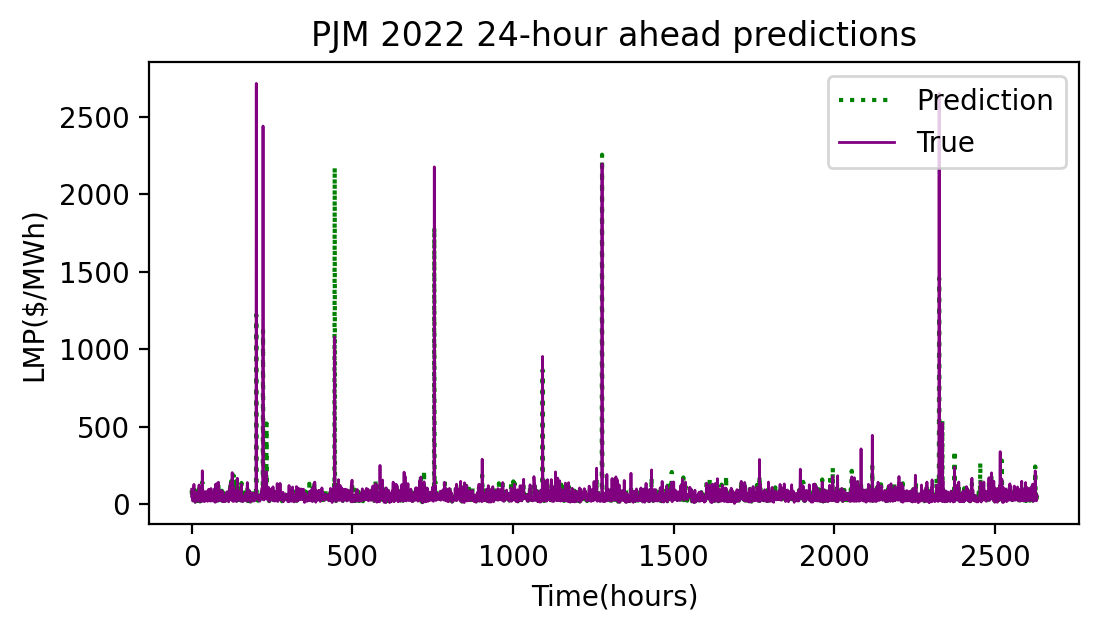

In [ ]:
plt.figure(figsize=(6,3))


plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("PJM 2022 24-hour ahead predictions")

hour= 24
n_day = 365
plot_day = hour*n_day

plt.plot(y_pred[:,-1], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test[:, -1], label='True', linewidth=1,color='purple')
plt.legend()
plt.show()

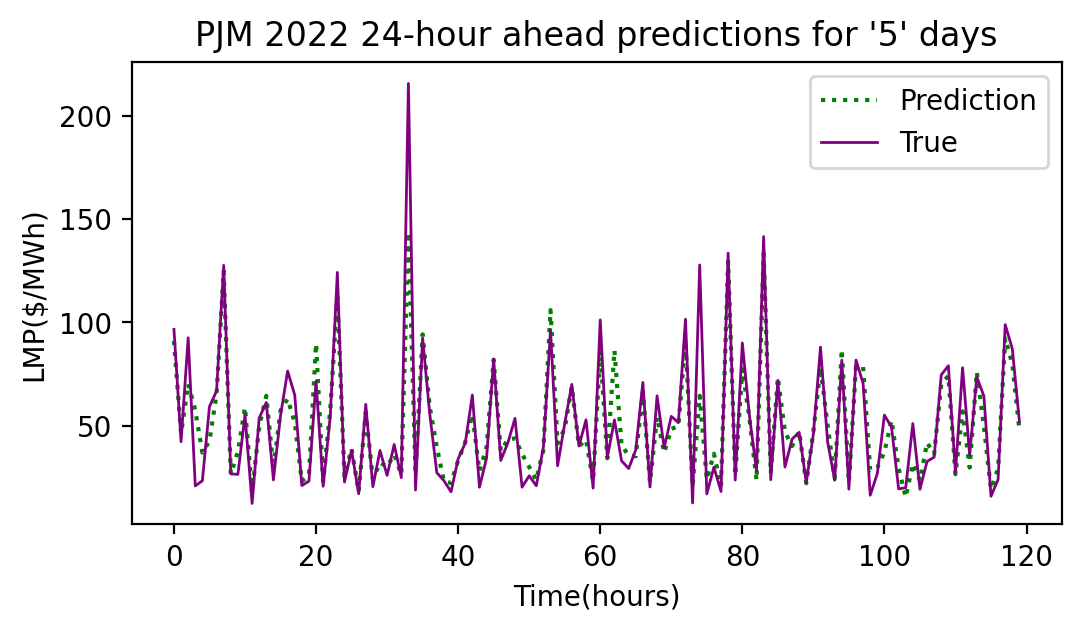

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("PJM 2022 24-hour ahead predictions for '5' days")

hour= 24
n_day = 5
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='True', linewidth=1,color='purple')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
errors = y_pred- y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('Mean Absolute Error: {:.2f}'.format(mae))
print('Root Mean Square Error: {:.2f}'.format(rmse))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 12.27
Root Mean Square Error: 54.16
R2 Score:  0.7735052105725994


## Gated Recurrent Units (GRUs)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Assuming df_all_2223 is a pandas DataFrame containing your dataset

# Prepare the input and output data
X = df_all_2223.drop(columns=['AEP GEN HUB'])  # Input features
y = df_all_2223['AEP GEN HUB']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to fit the GRU layer input shape
n_features = X_train.shape[1]  # Number of input features

X_train = np.reshape(X_train.values, (X_train.shape[0], 1, n_features))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, n_features))

# Build the GRU model
model = Sequential()
model.add(GRU(64, input_shape=(1, n_features)))  # 64 is the number of units in the GRU layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')  # You can choose a different optimizer and loss function if needed

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust the number of epochs and batch size as needed

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test)


Epoch 1/10
220/220 [==============================] - 3s 3ms/step - loss: 14523.5674
Epoch 2/10
220/220 [==============================] - 1s 4ms/step - loss: 13468.8467
Epoch 3/10
220/220 [==============================] - 1s 4ms/step - loss: 12889.7471
Epoch 4/10
220/220 [==============================] - 1s 5ms/step - loss: 12515.7334
Epoch 5/10
220/220 [==============================] - 1s 6ms/step - loss: 12205.8066
Epoch 6/10
220/220 [==============================] - 1s 6ms/step - loss: 11913.2832
Epoch 7/10
220/220 [==============================] - 1s 5ms/step - loss: 11665.7158
Epoch 8/10
220/220 [==============================] - 1s 4ms/step - loss: 11456.5234
Epoch 9/10
220/220 [==============================] - 1s 4ms/step - loss: 11286.5176
Epoch 10/10
55/55 [==============================] - 1s 2ms/step - loss: 8219.6113
Test Loss: 8219.611328125
55/55 [==============================] - 1s 2ms/step


# Machine Learning Part

# KNN Entegration

In [ ]:
df_all_2223

,AEP GEN HUB,AEP-DAYTON HUB,ATSI GEN HUB,CHICAGO GEN HUB,CHICAGO HUB,DOMINION HUB,EASTERN HUB,N ILLINOIS HUB,NEW JERSEY HUB,OHIO HUB,WEST INT HUB,WESTERN HUB
0,66.526689,68.095556,67.318277,65.559705,66.693074,69.495414,69.669366,66.248896,69.168388,68.268067,67.783333,68.755145
1,73.990110,75.501068,74.708125,72.656474,73.844903,77.405280,77.793004,73.368035,77.122941,75.629564,75.400555,76.753895
2,55.928728,56.996921,56.571705,54.765039,55.588311,58.358574,58.999558,55.258335,58.545221,57.086478,57.017916,58.048027
3,52.131930,53.100233,52.694148,51.074570,51.790448,54.294922,54.701800,51.508351,54.240732,53.176826,53.095880,53.991960
4,51.751316,52.390917,51.786250,49.386083,50.045211,53.740003,53.799772,49.809685,53.344182,52.374108,52.381388,53.275979
...,...,...,...,...,...,...,...,...,...,...,...,...
8780,40.385504,41.826911,41.265341,40.868154,41.504461,40.864404,38.182863,41.262732,38.245036,42.140567,40.678797,40.893079
8781,36.484737,37.688131,37.030644,36.783083,37.332459,37.237394,35.006358,37.121669,34.942577,37.917976,36.739306,36.893853
8782,26.041513,26.862939,26.062576,26.412109,26.802300,26.864957,22.804033,26.641553,23.194212,27.018790,26.099814,26.064243
8783,22.436031,23.111215,22.307936,22.598397,22.940277,22.976768,20.179709,22.802370,20.341271,23.241002,22.339676,22.208324


In [ ]:
X = df_all_2223.drop('AEP GEN HUB', axis=1)
X

,AEP-DAYTON HUB,ATSI GEN HUB,CHICAGO GEN HUB,CHICAGO HUB,DOMINION HUB,EASTERN HUB,N ILLINOIS HUB,NEW JERSEY HUB,OHIO HUB,WEST INT HUB,WESTERN HUB
0,68.095556,67.318277,65.559705,66.693074,69.495414,69.669366,66.248896,69.168388,68.268067,67.783333,68.755145
1,75.501068,74.708125,72.656474,73.844903,77.405280,77.793004,73.368035,77.122941,75.629564,75.400555,76.753895
2,56.996921,56.571705,54.765039,55.588311,58.358574,58.999558,55.258335,58.545221,57.086478,57.017916,58.048027
3,53.100233,52.694148,51.074570,51.790448,54.294922,54.701800,51.508351,54.240732,53.176826,53.095880,53.991960
4,52.390917,51.786250,49.386083,50.045211,53.740003,53.799772,49.809685,53.344182,52.374108,52.381388,53.275979
...,...,...,...,...,...,...,...,...,...,...,...
8780,41.826911,41.265341,40.868154,41.504461,40.864404,38.182863,41.262732,38.245036,42.140567,40.678797,40.893079
8781,37.688131,37.030644,36.783083,37.332459,37.237394,35.006358,37.121669,34.942577,37.917976,36.739306,36.893853
8782,26.862939,26.062576,26.412109,26.802300,26.864957,22.804033,26.641553,23.194212,27.018790,26.099814,26.064243
8783,23.111215,22.307936,22.598397,22.940277,22.976768,20.179709,22.802370,20.341271,23.241002,22.339676,22.208324


In [ ]:
y = df_all_2223['AEP GEN HUB']
y

0       66.526689
1       73.990110
2       55.928728
3       52.131930
4       51.751316
          ...    
8780    40.385504
8781    36.484737
8782    26.041513
8783    22.436031
8784    17.748531
Name: AEP GEN HUB, Length: 8785, dtype: float64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
#df_KNN = pd.read_csv('df_all_2223_KNN.csv')  # Replace 'your_dataset.csv' with your actual dataset filename

# Split the dataset into features (X) and target variable (y)
X = df_all_2223.drop('AEP GEN HUB', axis=1)  # Replace 'target_variable' with the actual column name of your target variable
y = df_all_2223['AEP GEN HUB']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) here

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

ValueError: ignored